In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [34]:
df = pd.read_csv('set15_it1.csv')

In [35]:
df

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit
0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,sqft
1,1,105000.0,GnomeBurough,Petalbridge,772.0,3960.0,sqft
2,2,79275.0,Meadowlands,Shadowmere,664.0,8172.0,sqft
3,3,140000.0,Meadowlands,Emberfall,1231.0,13825.0,sqft
4,4,150909.0,GnomeBurough,Mystvale,1406.0,9060.0,sqft
...,...,...,...,...,...,...,...
2358,2335,184500.0,Meadowlands,Duskwood,1056.0,13300.0,sqft
2359,2336,210000.0,Meadowlands,Nighthaven,1594.0,13175.0,sqft
2360,2337,223500.0,Meadowlands,Stormwatch,1212.0,21384.0,sqft
2361,2338,129900.0,Meadowlands,Dragonspire,627.0,7100.0,sqft


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DI              2363 non-null   int64  
 1   TradeValue      2363 non-null   float64
 2   RealmType       2363 non-null   object 
 3   Enclave         2363 non-null   object 
 4   LivingQuarters  2245 non-null   float64
 5   ParcelSize      2363 non-null   float64
 6   ParcelSizeUnit  2363 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 129.4+ KB


In [37]:
df.describe()

,DI,TradeValue,LivingQuarters,ParcelSize
count,2363.000000,2363.000000,2245.000000,2363.000000
mean,1169.813796,181150.568007,1157.071715,9889.801684
std,675.447687,82165.603916,392.780821,7954.890245
min,0.000000,61.500000,256.000000,-19378.000000
25%,584.500000,129825.000000,871.000000,7243.000000
50%,1170.000000,160000.000000,1116.000000,9320.000000
75%,1753.500000,213000.000000,1341.000000,11475.000000
max,2339.000000,755000.000000,4339.000000,164660.000000


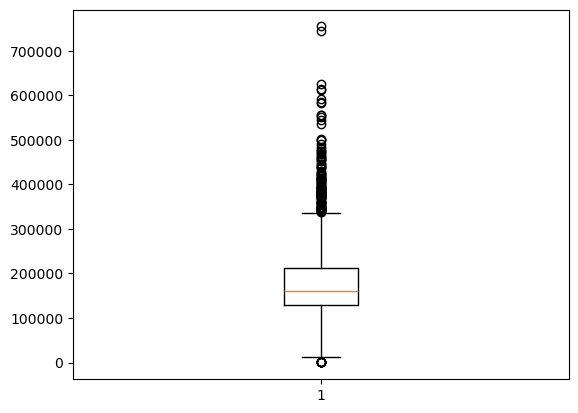

In [38]:
plt.boxplot(x=df['TradeValue'].dropna())
plt.show()

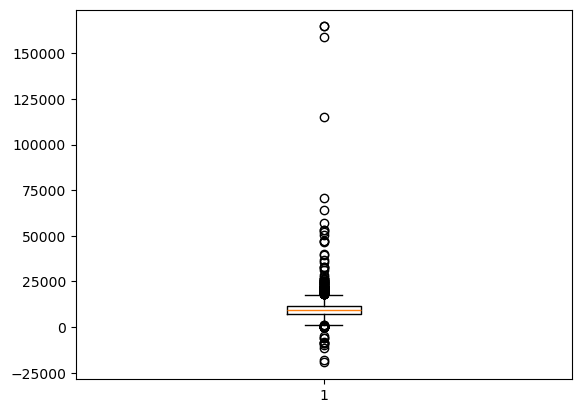

In [39]:
plt.boxplot(x=df['ParcelSize'].dropna())
plt.show()

(array([ 12.,   0.,   7.,  11.,  28.,  86.,  84., 200., 293., 312., 225.,
        220., 166., 113., 111.,  95.,  61.,  58.,  47.,  37.,  28.,  36.,
         22.,  15.,  18.,  17.,  11.,  11.,   5.,   6.,   6.,   4.,   2.,
          3.,   0.,   1.,   4.,   0.,   2.,   1.,   2.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([6.1500000e+01, 1.5160270e+04, 3.0259040e+04, 4.5357810e+04,
        6.0456580e+04, 7.5555350e+04, 9.0654120e+04, 1.0575289e+05,
        1.2085166e+05, 1.3595043e+05, 1.5104920e+05, 1.6614797e+05,
        1.8124674e+05, 1.9634551e+05, 2.1144428e+05, 2.2654305e+05,
        2.4164182e+05, 2.5674059e+05, 2.7183936e+05, 2.8693813e+05,
        3.0203690e+05, 3.1713567e+05, 3.3223444e+05, 3.4733321e+05,
        3.6243198e+05, 3.7753075e+05, 3.9262952e+05, 4.0772829e+05,
        4.2282706e+05, 4.3792583e+05, 4.5302460e+05, 4.6812337e+05,
        4.8322214e+05, 4.9832091e+05, 5.1341968e+05, 5.2851845e+05,
        5.4361722e+05, 5.5871599e+05, 5.738147

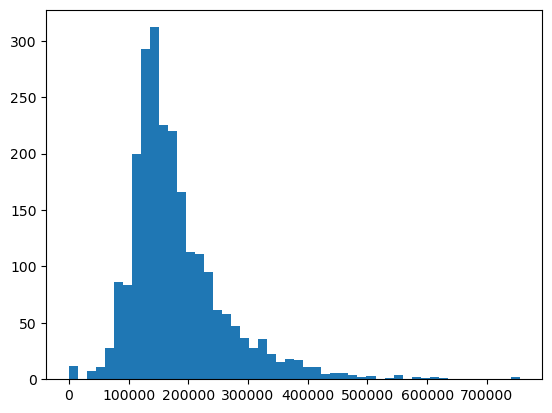

In [40]:
plt.hist(df["TradeValue"], bins=50)

In [41]:
df.sample(30)

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit
1511,1496,159895.0,Meadowlands,Dreamweaver,973.0,3182.00000,sqft
463,460,79900.0,GnomeBurough,Petalbridge,921.0,5586.00000,sqft
248,247,290000.0,AetherIsles,Wyverncliff,1091.0,4385.00000,sqft
2270,2248,157500.0,Meadowlands,Sunspire,1067.0,8340.00000,sqft
2238,2216,584500.0,Meadowlands,Glimmerwood,2692.0,17242.00000,sqft
921,913,105000.0,Meadowlands,Emberfall,670.0,17529.00000,sqft
1249,1238,139000.0,Meadowlands,Petalbridge,1104.0,10836.00000,sqft
1583,1568,189500.0,Meadowlands,Duskwood,1253.0,7984.00000,sqft
127,126,142500.0,Meadowlands,Emberfall,814.0,9000.00000,sqft
630,623,176000.0,Meadowlands,Dragonspire,1063.0,19296.00000,sqft


In [42]:
df.isna().sum()

DI                  0
TradeValue          0
RealmType           0
Enclave             0
LivingQuarters    118
ParcelSize          0
ParcelSizeUnit      0
dtype: int64

In [43]:
df['RealmType'].unique()

array(['Meadowlands', 'GnomeBurough', 'AetherIsles', 'ArcaneMarket',
       'CitadelQuarter'], dtype=object)

In [47]:
df['Enclave'].unique()

array(['Dragonspire', 'Petalbridge', 'Shadowmere', 'Emberfall',
       'Mystvale', 'Nighthaven', 'Crystalhollow', 'Brightforge',
       'Wyverncliff', 'Riverbend', 'Starfall', 'Duskwood', 'Sunspire',
       'Silverglen', 'Stormwatch', 'Wolfsbane', 'Thornfield',
       'Ravenstone', 'Stormhold', 'Dreamweaver', 'Glimmerwood',
       'Wolfsbanes', 'Windwhisper', 'Mossheart', 'Moonglade',
       'Oakenshade', 'Verdantia', 'DUSKWOOD', 'Crystalhollows',
       'cloudrest', 'DRAGONSPIRE', 'dreamweaver', 'Cloudrest',
       'SHADOWMERE', 'sunspire', 'dragonspire', 'WYVERNCLIFF',
       'PETALBRIDGE', 'Duskwoods', 'windwhisper', 'Brightforges',
       'RAVENSTONE', 'silverglen', 'SILVERGLEN', 'petalbridge',
       'Shadowmeres', 'crystalhollow'], dtype=object)

In [48]:
df['ParcelSizeUnit'].unique()

array(['sqft', 'sqm'], dtype=object)

In [49]:
df.duplicated().sum()

np.int64(23)

In [50]:
df['TradeValue'].sort_values().head(30)

496        61.5
1240       99.5
1002      127.0
184       129.5
1270      140.0
688       140.2
623       174.0
1636      215.0
147       227.0
1126      255.5
1184      610.0
2226    12789.0
156     34900.0
16      35311.0
851     37900.0
475     39300.0
871     40000.0
488     44000.0
1348    45000.0
1168    46500.0
1890    50138.0
1996    51689.0
1282    52000.0
1499    52500.0
110     55000.0
1226    55993.0
699     58500.0
763     59000.0
2066    60000.0
1820    60000.0
Name: TradeValue, dtype: float64